# 6. Interpolation
https://docs.scipy.org/doc/scipy/reference/tutorial/index.html   
https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


There are several general interpolation facilities available in SciPy, for data in 1, 2, and higher dimensions:

- A class representing an interpolant (interp1d) in 1-D, offering several interpolation methods.
- Convenience function griddata offering a simple interface to interpolation in N dimensions (N = 1, 2, 3, 4, ...). Object-oriented interface for the underlying routines is also available.
- Functions for 1- and 2-dimensional (smoothed) cubic-spline interpolation, based on the FORTRAN library FITPACK. There are both procedural and object-oriented interfaces for the FITPACK library.
- Interpolation using Radial Basis Functions.

## 1-D interpolation (interp1d)
The ***interp1d*** class in ***scipy.interpolate*** is a convenient method to create a function based on fixed data points which can be evaluated anywhere within the domain defined by the given data using linear interpolation. An instance of this class is created by passing the 1-d vectors comprising the data. The instance of this class defines a __call__ method and can therefore by treated like a function which interpolates between known data values to obtain unknown values (it also has a docstring for help). Behavior at the boundary can be specified at instantiation time. The following example demonstrates its use, for linear and cubic spline interpolation:

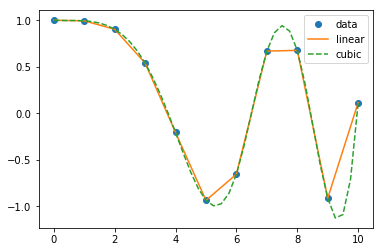

In [4]:
from scipy.interpolate import interp1d 

x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)
f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')

xnew = np.linspace(0, 10, num=41, endpoint=True)

plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.show()

## Multivariate data interpolation (griddata)
Suppose you have multidimensional data, for instance for an underlying function f(x, y) you only know the values at points (x[i], y[i]) that do not form a regular grid.

Suppose we want to interpolate the 2-D function

In [5]:
def func(x, y):
    return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2

on a grid in [0, 1]x[0, 1]

In [37]:
grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j]
# grid_x,  grid_y

but we only know its values at 1000 data points:

In [16]:
points = np.random.rand(1000, 2)
values = func(points[:,0], points[:,1])

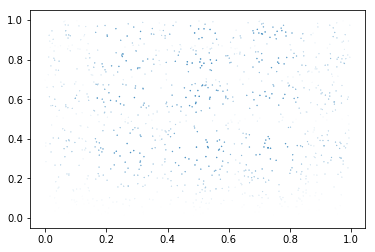

In [35]:
plt.scatter(points[:,0], points[:,1], np.abs(values))

This can be done with griddata – below we try out all of the interpolation methods:

In [8]:
from scipy.interpolate import griddata
grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')
grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear')
grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic')

One can see that the exact result is reproduced by all of the methods to some degree, but for this smooth function the piecewise cubic interpolant gives the best results:

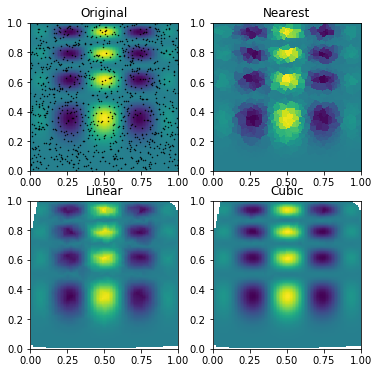

In [9]:
plt.subplot(221)
plt.imshow(func(grid_x, grid_y).T, extent=(0,1,0,1), origin='lower')
plt.plot(points[:,0], points[:,1], 'k.', ms=1)
plt.title('Original')

plt.subplot(222)
plt.imshow(grid_z0.T, extent=(0,1,0,1), origin='lower')
plt.title('Nearest')

plt.subplot(223)
plt.imshow(grid_z1.T, extent=(0,1,0,1), origin='lower')
plt.title('Linear')

plt.subplot(224)
plt.imshow(grid_z2.T, extent=(0,1,0,1), origin='lower')
plt.title('Cubic')

plt.gcf().set_size_inches(6, 6)
plt.show()

## Spline interpolation
### Spline interpolation in 1-d: Procedural (interpolate.splXXX)

Spline interpolation requires two essential steps: 
1. a spline representation of the curve is computed, and 
2. the spline is evaluated at the desired points. 

In order to find the spline representation, there are two different ways to represent a curve and obtain (smoothing) spline coefficients: directly and parametrically. The direct method finds the spline representation of a curve in a two- dimensional plane using the function ***splrep***. The first two arguments are the only ones required, and these provide the xx and yy components of the curve. The normal output is a 3-tuple, (t,c,k)(t,c,k) , containing the knot-points, tt , the coefficients cc and the order kk of the spline. The default spline order is cubic, but this can be changed with the input keyword, k.

For curves in NN -dimensional space the function ***splprep*** allows defining the curve parametrically. For this function only 1 input argument is required. This input is a list of NN -arrays representing the curve in NN -dimensional space. The length of each array is the number of curve points, and each array provides one component of the NN -dimensional data point. The parameter variable is given with the keyword argument, u, which defaults to an equally-spaced monotonic sequence between 00 and 11 . The default output consists of two objects: a 3-tuple, (t,c,k)(t,c,k) , containing the spline representation and the parameter variable u.u.

The keyword argument, ***s*** , is used to specify the ***amount of smoothing*** to perform during the spline fit. The default value of ss is ***$s=m-\sqrt{2m}$*** where mm is the number of data-points being fit. Therefore, ***if no smoothing is desired a value of s=0s=0 should be passed to the routines***.

Once the spline representation of the data has been determined, functions are available for evaluating the spline (splev) and its derivatives (splev, spalde) at any point and the integral of the spline between any two points ( splint). In addition, for cubic splines ( k=3k=3 ) with 8 or more knots, the roots of the spline can be estimated ( sproot). These functions are demonstrated in the example that follows.

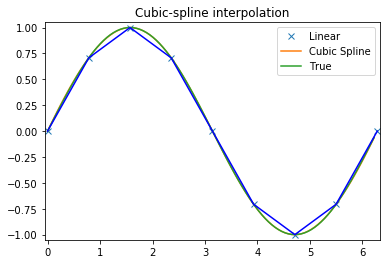

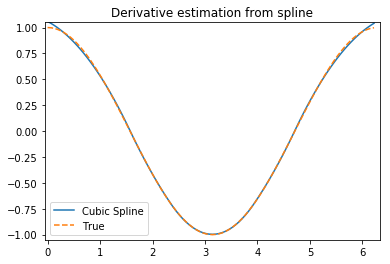

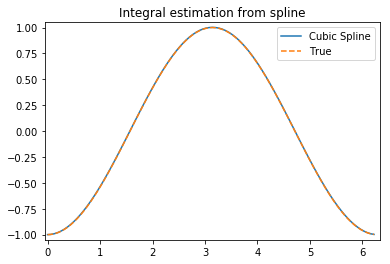

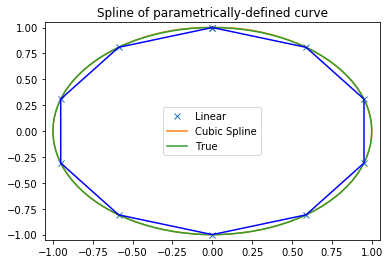

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

# Cubic-spline

x = np.arange(0, 2*np.pi+np.pi/4, 2*np.pi/8)
y = np.sin(x)
tck = interpolate.splrep(x, y, s=0)
xnew = np.arange(0, 2*np.pi, np.pi/50)
ynew = interpolate.splev(xnew, tck, der=0)

plt.figure()
plt.plot(x, y, 'x', xnew, ynew, xnew, np.sin(xnew), x, y, 'b')
plt.legend(['Linear', 'Cubic Spline', 'True'])
plt.axis([-0.05, 6.33, -1.05, 1.05])
plt.title('Cubic-spline interpolation')
plt.show()

# Derivative of spline

yder = interpolate.splev(xnew, tck, der=1)
plt.figure()
plt.plot(xnew, yder, xnew, np.cos(xnew),'--')
plt.legend(['Cubic Spline', 'True'])
plt.axis([-0.05, 6.33, -1.05, 1.05])
plt.title('Derivative estimation from spline')
plt.show()

# Integral of spline

def integ(x, tck, constant=-1):
    x = np.atleast_1d(x)
    out = np.zeros(x.shape, dtype=x.dtype)
    for n in range(len(out)):
        out[n] = interpolate.splint(0, x[n], tck)
    out += constant
    return out

yint = integ(xnew, tck)
plt.figure()
plt.plot(xnew, yint, xnew, -np.cos(xnew), '--')
plt.legend(['Cubic Spline', 'True'])
plt.axis([-0.05, 6.33, -1.05, 1.05])
plt.title('Integral estimation from spline')
plt.show()

# Roots of spline

interpolate.sproot(tck)
# array([3.1416])

# Notice that `sproot` failed to find an obvious solution at the edge of the
# approximation interval, :math:`x = 0`. If we define the spline on a slightly
# larger interval, we recover both roots :math:`x = 0` and :math:`x = 2\pi`:

x = np.linspace(-np.pi/4, 2.*np.pi + np.pi/4, 21)
y = np.sin(x)
tck = interpolate.splrep(x, y, s=0)
interpolate.sproot(tck)
# array([0., 3.1416])

# Parametric spline

t = np.arange(0, 1.1, .1)
x = np.sin(2*np.pi*t)
y = np.cos(2*np.pi*t)
tck, u = interpolate.splprep([x, y], s=0)
unew = np.arange(0, 1.01, 0.01)
out = interpolate.splev(unew, tck)
plt.figure()
plt.plot(x, y, 'x', out[0], out[1], np.sin(2*np.pi*unew), np.cos(2*np.pi*unew), x, y, 'b')
plt.legend(['Linear', 'Cubic Spline', 'True'])
plt.axis([-1.05, 1.05, -1.05, 1.05])
plt.title('Spline of parametrically-defined curve')
plt.show()

## Spline interpolation in 1-d: Object-oriented (UnivariateSpline)

The spline-fitting capabilities described above are also available via an objected-oriented interface. The one dimensional splines are objects of the UnivariateSpline class, and are created with the xx and yy components of the curve provided as arguments to the constructor. The class defines __call__, allowing the object to be called with the x-axis values at which the spline should be evaluated, returning the interpolated y-values. This is shown in the example below for the subclass InterpolatedUnivariateSpline. The integral, derivatives, and roots methods are also available on UnivariateSpline objects, allowing definite integrals, derivatives, and roots to be computed for the spline.

The UnivariateSpline class can also be used to smooth data by providing a non-zero value of the smoothing parameter s, with the same meaning as the s keyword of the splrep function described above. This results in a spline that has fewer knots than the number of data points, and hence is no longer strictly an interpolating spline, but rather a smoothing spline. If this is not desired, the InterpolatedUnivariateSpline class is available. It is a subclass of UnivariateSpline that always passes through all points (equivalent to forcing the smoothing parameter to 0). This class is demonstrated in the example below.

The LSQUnivariateSpline class is the other subclass of UnivariateSpline. It allows the user to specify the number and location of internal knots explicitly with the parameter t. This allows creation of customized splines with non-linear spacing, to interpolate in some domains and smooth in others, or change the character of the spline.

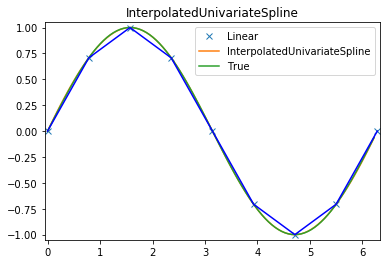

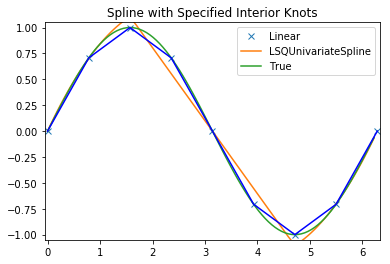

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

# InterpolatedUnivariateSpline

x = np.arange(0, 2*np.pi+np.pi/4, 2*np.pi/8)
y = np.sin(x)
s = interpolate.InterpolatedUnivariateSpline(x, y)
xnew = np.arange(0, 2*np.pi, np.pi/50)
ynew = s(xnew)

plt.figure()
plt.plot(x, y, 'x', xnew, ynew, xnew, np.sin(xnew), x, y, 'b')
plt.legend(['Linear', 'InterpolatedUnivariateSpline', 'True'])
plt.axis([-0.05, 6.33, -1.05, 1.05])
plt.title('InterpolatedUnivariateSpline')
plt.show()

# LSQUnivarateSpline with non-uniform knots

t = [np.pi/2-.1, np.pi/2+.1, 3*np.pi/2-.1, 3*np.pi/2+.1]
s = interpolate.LSQUnivariateSpline(x, y, t, k=2)
ynew = s(xnew)

plt.figure()
plt.plot(x, y, 'x', xnew, ynew, xnew, np.sin(xnew), x, y, 'b')
plt.legend(['Linear', 'LSQUnivariateSpline', 'True'])
plt.axis([-0.05, 6.33, -1.05, 1.05])
plt.title('Spline with Specified Interior Knots')
plt.show()

## Two-dimensional spline representation: Procedural (bisplrep)

For (smooth) spline-fitting to a two dimensional surface, the function bisplrep is available. This function takes as required inputs the 1-D arrays x, y, and z which represent points on the surface z=f(x,y).z=f(x,y). The default output is a list [tx,ty,c,kx,ky][tx,ty,c,kx,ky] whose entries represent respectively, the components of the knot positions, the coefficients of the spline, and the order of the spline in each coordinate. It is convenient to hold this list in a single object, tck, so that it can be passed easily to the function bisplev. The keyword, s , can be used to change the amount of smoothing performed on the data while determining the appropriate spline. The default value is s=m−2m‾‾‾√s=m−2m where mm is the number of data points in the x, y, and z vectors. As a result, if no smoothing is desired, then s=0s=0 should be passed to bisplrep .

To evaluate the two-dimensional spline and it’s partial derivatives (up to the order of the spline), the function bisplev is required. This function takes as the first two arguments two 1-D arrays whose cross-product specifies the domain over which to evaluate the spline. The third argument is the tck list returned from bisplrep. If desired, the fourth and fifth arguments provide the orders of the partial derivative in the xx and yy direction respectively.

It is important to note that two dimensional interpolation should not be used to find the spline representation of images. The algorithm used is not amenable to large numbers of input points. The signal processing toolbox contains more appropriate algorithms for finding the spline representation of an image. The two dimensional interpolation commands are intended for use when interpolating a two dimensional function as shown in the example that follows. This example uses the mgrid command in NumPy which is useful for defining a “mesh-grid” in many dimensions. (See also the ogrid command if the full-mesh is not needed). The number of output arguments and the number of dimensions of each argument is determined by the number of indexing objects passed in mgrid.

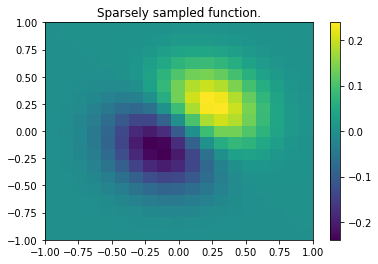

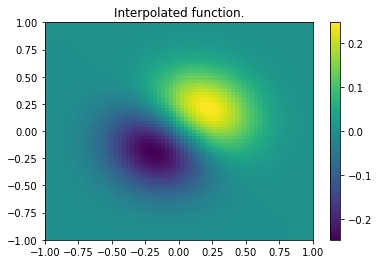

In [40]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

# Define function over sparse 20x20 grid

x, y = np.mgrid[-1:1:20j, -1:1:20j]
z = (x+y) * np.exp(-6.0*(x*x+y*y))

plt.figure()
plt.pcolor(x, y, z)
plt.colorbar()
plt.title("Sparsely sampled function.")
plt.show()

# Interpolate function over new 70x70 grid

xnew, ynew = np.mgrid[-1:1:70j, -1:1:70j]
tck = interpolate.bisplrep(x, y, z, s=0)
znew = interpolate.bisplev(xnew[:,0], ynew[0,:], tck)

plt.figure()
plt.pcolor(xnew, ynew, znew)
plt.colorbar()
plt.title("Interpolated function.")
plt.show()

### Two-dimensional spline representation: Object-oriented (BivariateSpline)

The BivariateSpline class is the 2-dimensional analog of the UnivariateSpline class. It and its subclasses implement the FITPACK functions described above in an object oriented fashion, allowing objects to be instantiated that can be called to compute the spline value by passing in the two coordinates as the two arguments.

## Using radial basis functions for smoothing/interpolation
Radial basis functions can be used for smoothing/interpolating scattered data in n-dimensions, but should be used with caution for extrapolation outside of the observed data range.

### 1-d Example

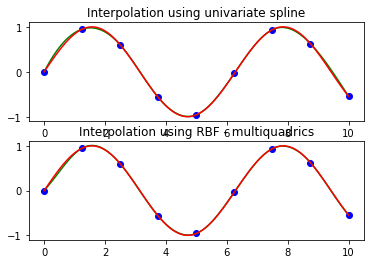

In [41]:
import numpy as np
from scipy.interpolate import Rbf, InterpolatedUnivariateSpline
import matplotlib.pyplot as plt

# setup data
x = np.linspace(0, 10, 9)
y = np.sin(x)
xi = np.linspace(0, 10, 101)

# use fitpack2 method
ius = InterpolatedUnivariateSpline(x, y)
yi = ius(xi)

plt.subplot(2, 1, 1)
plt.plot(x, y, 'bo')
plt.plot(xi, yi, 'g')
plt.plot(xi, np.sin(xi), 'r')
plt.title('Interpolation using univariate spline')

# use RBF method
rbf = Rbf(x, y)
fi = rbf(xi)

plt.subplot(2, 1, 2)
plt.plot(x, y, 'bo')
plt.plot(xi, fi, 'g')
plt.plot(xi, np.sin(xi), 'r')
plt.title('Interpolation using RBF - multiquadrics')
plt.show()

### 2-d Example

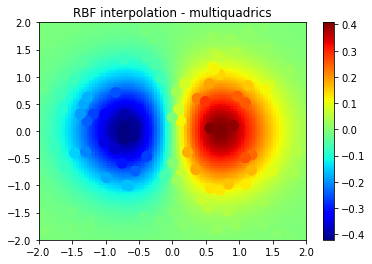

In [42]:
import numpy as np
from scipy.interpolate import Rbf
import matplotlib.pyplot as plt
from matplotlib import cm

# 2-d tests - setup scattered data
x = np.random.rand(100)*4.0-2.0
y = np.random.rand(100)*4.0-2.0
z = x*np.exp(-x**2-y**2)
ti = np.linspace(-2.0, 2.0, 100)
XI, YI = np.meshgrid(ti, ti)

# use RBF
rbf = Rbf(x, y, z, epsilon=2)
ZI = rbf(XI, YI)

# plot the result
plt.subplot(1, 1, 1)
plt.pcolor(XI, YI, ZI, cmap=cm.jet)
plt.scatter(x, y, 100, z, cmap=cm.jet)
plt.title('RBF interpolation - multiquadrics')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.colorbar()